In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [25]:
df = pd.read_csv('data/train.csv')

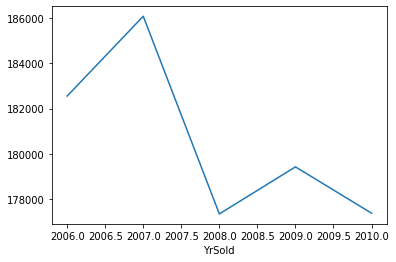

In [63]:
avrg_price_per_yr = df.groupby('YrSold')['SalePrice'].mean().plot()

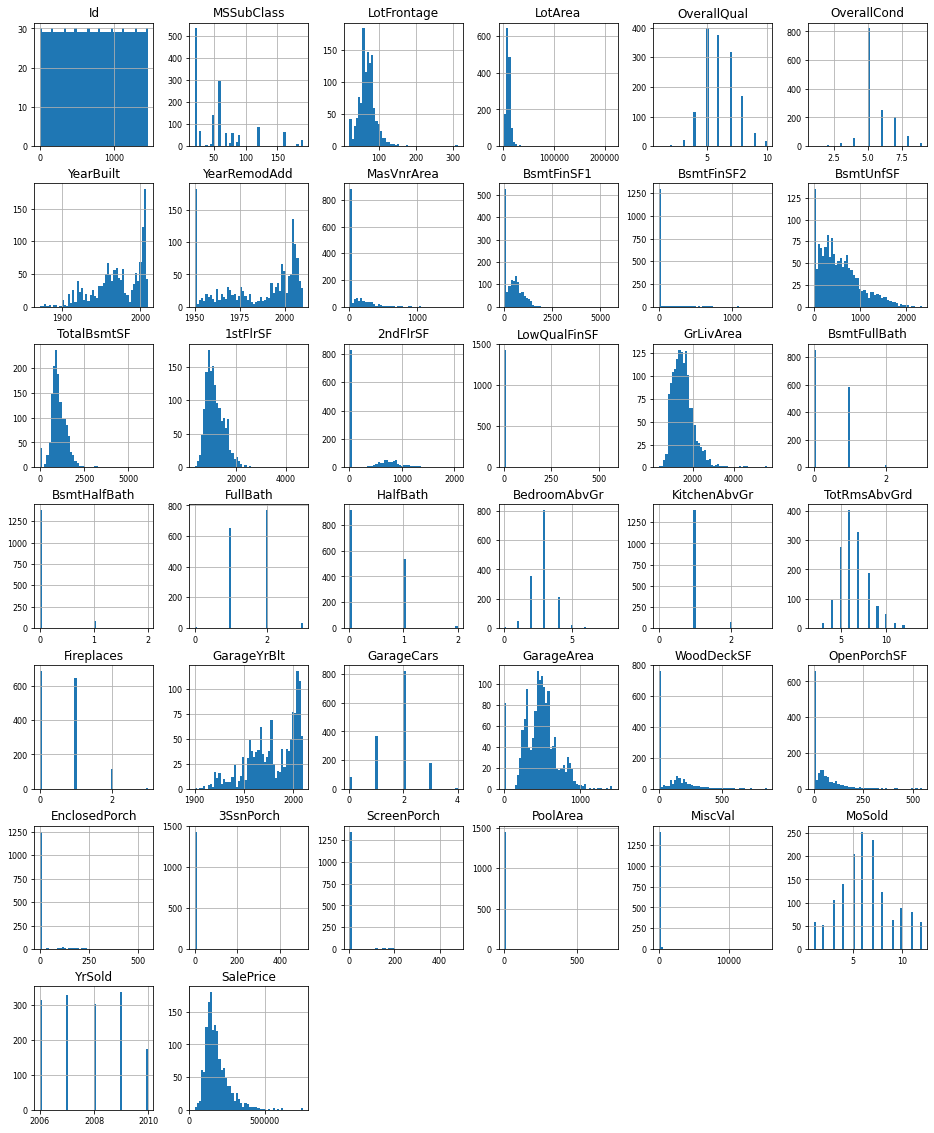

In [64]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

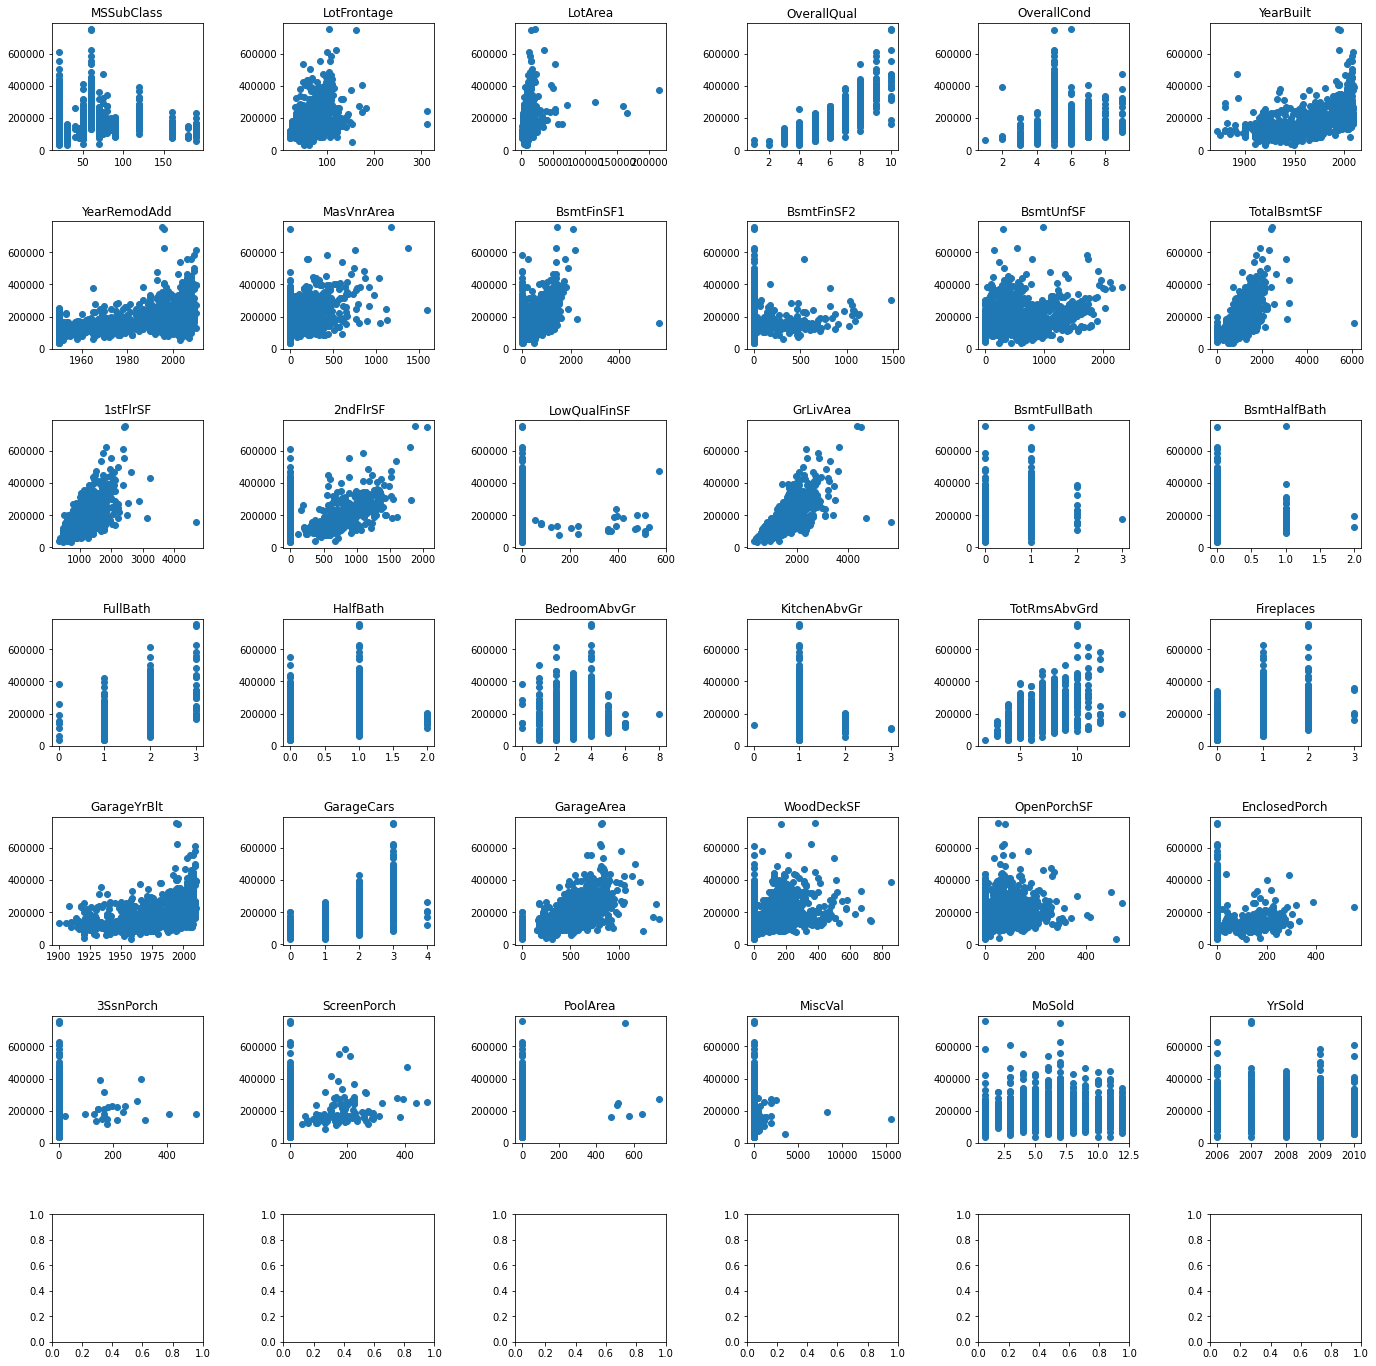

In [65]:
fig, ax = pyplot.subplots(nrows=7, ncols=6,figsize=(20, 20))
fig.tight_layout(pad=5.0)
for indx,i in enumerate(df_num.iloc[:,1:-1]):
    ax[indx//6][indx%6].set_title(i)
    ax[indx//6][indx%6].scatter(df_num[i],df_num['SalePrice'],)

In [27]:
for indx,i in enumerate(df.iloc[:,1:-1]):
    print(i) if any(df[i].isnull()) else ...

In [26]:
df["MasVnrType"].fillna('None',inplace=True)
df["Electrical"].fillna('SBrkr',inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
df['SaleType'].fillna('Other',inplace=True)
df['Functional'].fillna('Typ',inplace=True)
df['KitchenQual'].fillna('TA',inplace=True)

# Fill rest with defaults
for indx,i in enumerate(df.iloc[:,1:-1]):
    if df[i].dtype == 'object':
        df[i].fillna('NO',inplace=True)
    else:
        df[i].fillna(0,inplace=True)


In [20]:
df[df['GarageFinish'] == 'NO']['GarageArea'].value_counts()

0.0      76
360.0     1
Name: GarageArea, dtype: int64

In [28]:
# Choose between saving the train csv and test csv
df.to_csv('data/train_processed.csv',index=False)
# df.to_csv('data/test_processed.csv',index=False)